<a href="https://colab.research.google.com/github/ZainabFadil/Chest_X_Ray/blob/main/Copy_of_Chest_x_Ray_new1_(22f).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth= 100

import random
import os


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from tensorflow.keras.models import Sequential
from tensorflow.keras import layers


from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras import applications
from tensorflow.keras.backend import clear_session
from tensorflow.keras import Model

import shutil
# import warnings
# warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
100% 2.29G/2.29G [00:16<00:00, 71.0MB/s]
100% 2.29G/2.29G [00:16<00:00, 153MB/s] 


In [ ]:
!unzip /content/chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
#number of image in each folder
print(len(os.listdir('/content/chest_xray/train/NORMAL')))
print(len(os.listdir('/content/chest_xray/train/PNEUMONIA')))

1341
3875


In [ ]:
print(len(os.listdir('/content/chest_xray/test/NORMAL')))
print(len(os.listdir('/content/chest_xray/test/PNEUMONIA')))

234
390


In [ ]:
print(len(os.listdir('/content/chest_xray/val/NORMAL')))
print(len(os.listdir('/content/chest_xray/val/PNEUMONIA')))

8
8


In [ ]:
# Data Preprocessing

In [ ]:
train='/content/chest_xray/train'
val='/content/chest_xray/test'
test='/content/chest_xray/val'

In [ ]:
# List to store image file paths
train_data_images = []

# Traverse through subdirectories in the source directory
for root, dirs, files in os.walk(train):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Filter image files
            # Get the full path of each image file
            file_path = os.path.join(root, file)
            train_data_images.append(file_path)

In [ ]:
val_data_images = []

# Traverse through subdirectories in the source directory
for root, dirs, files in os.walk(val):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Filter image files
            # Get the full path of each image file
            file_path = os.path.join(root, file)
            val_data_images.append(file_path)

In [ ]:
test_data_images = []

# Traverse through subdirectories in the source directory
for root, dirs, files in os.walk(test):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):  # Filter image files
            # Get the full path of each image file
            file_path = os.path.join(root, file)
            test_data_images.append(file_path)

In [ ]:
# Shuffle the image paths list
random.shuffle(train_data_images)
random.shuffle(test_data_images)
random.shuffle(val_data_images)

In [ ]:
#lenght of train
print(len(train_data_images))
print(len(test_data_images))
print(len(val_data_images))

5216
16
624


In [ ]:
train_data_images[:50]

['/content/chest_xray/train/PNEUMONIA/person478_bacteria_2035.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-1244-0001.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person544_virus_1078.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person401_virus_798.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person326_virus_677.jpeg',
 '/content/chest_xray/train/NORMAL/NORMAL2-IM-1130-0001.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person823_virus_1459.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person38_bacteria_195.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person140_virus_285.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person629_virus_1207.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person26_bacteria_124.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person835_virus_1472.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person917_bacteria_2842.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person921_virus_1578.jpeg',
 '/content/chest_xray/train/PNEUMONIA/person281_bacteria_1329.jpeg',
 '/conte

In [ ]:
train_data='/content/chest_xray/train'
val_data='/content/chest_xray/test'
test_data='/content/chest_xray/val'

In [ ]:
img_size=(224,224)
batch_size=32

# Data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
Val_datagen = ImageDataGenerator(rescale=1./255)


# Load the images and labels from the directories
train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = Val_datagen.flow_from_directory(
    val_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [ ]:
# #make folder called train_data
os.mkdir('/content/train_data')
os.mkdir('/content/val_data')
os.mkdir('/content/test_data')

In [ ]:
print(train_data)

/content/chest_xray/train


In [ ]:
# Ensure the destination folder exists, if not, create it
os.makedirs(train_data, exist_ok=True)

# Loop over each image in the list and copy it to the destination folder
for image in train_data_images:
    if os.path.exists(image):  # Check if the image file exists in the current directory
        shutil.copy(image, train_data)
        print(f"Copied {image} to {train_data}")
    else:
        print(f"Image {image} not found!")

# List the files in the destination folder to verify
print("Files in train_data folder:", os.listdir(train_data))

Streaming output truncated to the last 5000 lines.
Copied /content/chest_xray/train/PNEUMONIA/person336_bacteria_1549.jpeg to /content/chest_xray/train
Copied /content/chest_xray/train/PNEUMONIA/person1343_bacteria_3409.jpeg to /content/chest_xray/train
Copied /content/chest_xray/train/PNEUMONIA/person554_bacteria_2321.jpeg to /content/chest_xray/train
Copied /content/chest_xray/train/NORMAL/NORMAL2-IM-0846-0001.jpeg to /content/chest_xray/train
Copied /content/chest_xray/train/NORMAL/NORMAL2-IM-1204-0001.jpeg to /content/chest_xray/train
Copied /content/chest_xray/train/PNEUMONIA/person125_virus_254.jpeg to /content/chest_xray/train
Copied /content/chest_xray/train/NORMAL/NORMAL2-IM-0837-0001.jpeg to /content/chest_xray/train
Copied /content/chest_xray/train/PNEUMONIA/person579_bacteria_2381.jpeg to /content/chest_xray/train
Copied /content/chest_xray/train/NORMAL/NORMAL2-IM-0522-0001.jpeg to /content/chest_xray/train
Copied /content/chest_xray/train/PNEUMONIA/person1223_bacteria_3178

In [ ]:
len(os.listdir(train_data))

5218

In [ ]:
# Ensure the destination folder exists, if not, create it
os.makedirs(val_data, exist_ok=True)

# Loop over each image in the list and copy it to the destination folder
for image in val_data_images:
    if os.path.exists(image):  # Check if the image file exists in the current directory
        shutil.copy(image, val_data)
        print(f"Copied {image} to {val_data}")
    else:
        print(f"Image {image} not found!")

# List the files in the destination folder to verify
print("Files in train_data folder:", os.listdir(val_data))

Copied /content/chest_xray/test/PNEUMONIA/person63_virus_121.jpeg to /content/chest_xray/test
Copied /content/chest_xray/test/NORMAL/NORMAL2-IM-0120-0001.jpeg to /content/chest_xray/test
Copied /content/chest_xray/test/PNEUMONIA/person21_virus_52.jpeg to /content/chest_xray/test
Copied /content/chest_xray/test/PNEUMONIA/person49_virus_101.jpeg to /content/chest_xray/test
Copied /content/chest_xray/test/NORMAL/NORMAL2-IM-0280-0001.jpeg to /content/chest_xray/test
Copied /content/chest_xray/test/NORMAL/NORMAL2-IM-0349-0001.jpeg to /content/chest_xray/test
Copied /content/chest_xray/test/NORMAL/NORMAL2-IM-0350-0001.jpeg to /content/chest_xray/test
Copied /content/chest_xray/test/PNEUMONIA/person82_bacteria_405.jpeg to /content/chest_xray/test
Copied /content/chest_xray/test/PNEUMONIA/person1616_virus_2802.jpeg to /content/chest_xray/test
Copied /content/chest_xray/test/PNEUMONIA/person100_bacteria_478.jpeg to /content/chest_xray/test
Copied /content/chest_xray/test/NORMAL/NORMAL2-IM-0362-

In [ ]:
# Ensure the destination folder exists, if not, create it
os.makedirs(test_data, exist_ok=True)

# Loop over each image in the list and copy it to the destination folder
for image in test_data_images:
    if os.path.exists(image):  # Check if the image file exists in the current directory
        shutil.copy(image, test_data)
        print(f"Copied {image} to {test_data}")
    else:
        print(f"Image {image} not found!")

# List the files in the destination folder to verify
print("Files in train_data folder:", os.listdir(test_data))

Copied /content/chest_xray/val/PNEUMONIA/person1952_bacteria_4883.jpeg to /content/chest_xray/val
Copied /content/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg to /content/chest_xray/val
Copied /content/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg to /content/chest_xray/val
Copied /content/chest_xray/val/NORMAL/NORMAL2-IM-1427-0001.jpeg to /content/chest_xray/val
Copied /content/chest_xray/val/PNEUMONIA/person1946_bacteria_4875.jpeg to /content/chest_xray/val
Copied /content/chest_xray/val/PNEUMONIA/person1949_bacteria_4880.jpeg to /content/chest_xray/val
Copied /content/chest_xray/val/PNEUMONIA/person1950_bacteria_4881.jpeg to /content/chest_xray/val
Copied /content/chest_xray/val/NORMAL/NORMAL2-IM-1438-0001.jpeg to /content/chest_xray/val
Copied /content/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg to /content/chest_xray/val
Copied /content/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg to /content/chest_xray/val
Copied /content/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpe

In [ ]:
print(len(train_data_images))
print(len(val_data_images))
print(len(test_data_images))

5216
624
16


In [ ]:
train_data

'/content/chest_xray/train'

In [ ]:
#train_data[:50]
len(os.listdir(train_data))

5218

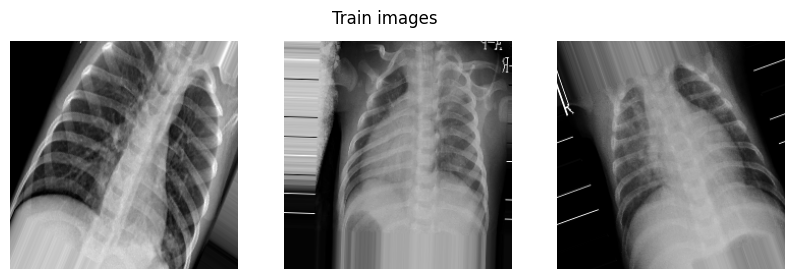

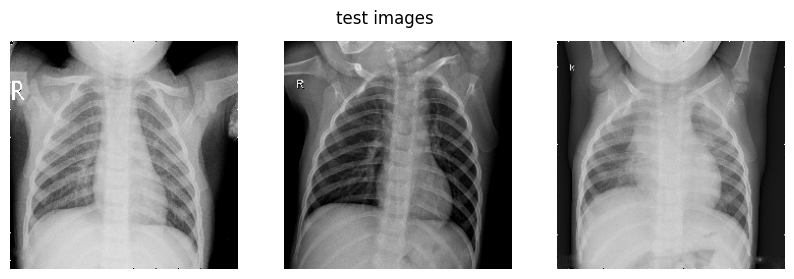

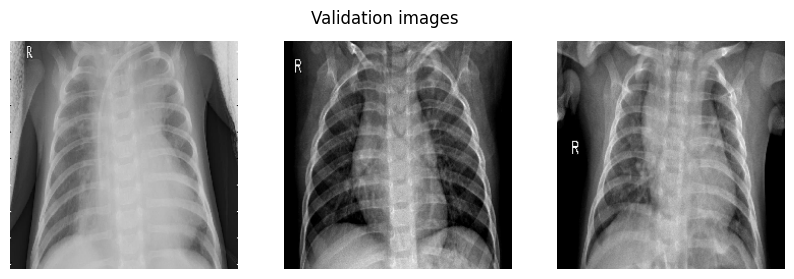

In [ ]:
import matplotlib.pyplot as plt

def plot_images(generator,title):
    x,y=next(generator)
    fig , axes =plt.subplots(1,3,figsize=(10,3))
    fig.suptitle(title,fontsize=12)
    for i in range(3):
        axes[i].imshow(x[i])
        axes[i].axis('off')
    plt.show()
plot_images(train_generator ,'Train images')
plot_images(test_generator ,'test images')
plot_images(val_generator ,'Validation images')

#Building Model

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

model_checkpoint_callback = ModelCheckpoint(
    filepath='CNN.weights.h5',
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True
)

In [ ]:
Early_Stopping=EarlyStopping(monitor='val_loss',patience=5)
reduce_lr=ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.00005)

In [ ]:
IMG_SIZE=224

def get_model():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[inputs], outputs=output)

    return model

In [ ]:
# img_L=224

# model=Sequential([
#     layers.Conv2D(32,(3,3),activation='relu', input_shape=(img_L, img_L,3)),
#     layers.MaxPool2D((2,2)),

#     layers.Conv2D(64,(3,3),activation='relu'),
#     layers.MaxPool2D((2,2)),

#     layers.Conv2D(128,(3,3),activation='relu'),
#     layers.MaxPool2D((2,2)),

#     layers.Flatten(),

#     layers.Dense(128,activation='relu'),

#     layers.Dense(1,activation='sigmoid')

# ])

In [ ]:
model_get=get_model()
model_get.compile(loss='binary_crossentropy'
              , optimizer =optimizers.Adam(learning_rate=5e-5), metrics=['binary_accuracy'])

model_get.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 50, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,560,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │              

 Total params: 2,621,089 (10.00 MB)

 Trainable params: 2,620,865 (10.00 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
# history_get=model_get.fit(
#     train_generator,
#     epochs=20,
#     validation_data=val_generator,
#     callbacks=[model_checkpoint_callback,Early_Stopping,reduce_lr]
# )

In [ ]:
# model.compile(
#     optimizer='adam',
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

In [ ]:
model_get.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 222, 222, 16)        │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 222, 222, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 109, 109, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 109, 109, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 50, 50, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 50, 50, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 40000)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,560,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │              

 Total params: 2,621,089 (10.00 MB)

 Trainable params: 2,620,865 (10.00 MB)

 Non-trainable params: 224 (896.00 B)

In [ ]:
history=model_get.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[model_checkpoint_callback,Early_Stopping,reduce_lr]
)

Epoch 1/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 614ms/step - binary_accuracy: 0.7425 - loss: 0.5263 - val_binary_accuracy: 0.5000 - val_loss: 2.3057 - learning_rate: 5.0000e-05
Epoch 2/30


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_accuracy available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


163/163 ━━━━━━━━━━━━━━━━━━━━ 137s 583ms/step - binary_accuracy: 0.8005 - loss: 0.3922 - val_binary_accuracy: 0.5000 - val_loss: 3.9114 - learning_rate: 5.0000e-05
Epoch 3/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 571ms/step - binary_accuracy: 0.8537 - loss: 0.3055 - val_binary_accuracy: 0.5000 - val_loss: 3.2524 - learning_rate: 5.0000e-05
Epoch 4/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 141s 571ms/step - binary_accuracy: 0.8665 - loss: 0.2882 - val_binary_accuracy: 0.5000 - val_loss: 2.2347 - learning_rate: 5.0000e-05
Epoch 5/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 577ms/step - binary_accuracy: 0.8833 - loss: 0.2763 - val_binary_accuracy: 0.6875 - val_loss: 1.3335 - learning_rate: 5.0000e-05
Epoch 6/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 97s 570ms/step - binary_accuracy: 0.8803 - loss: 0.2601 - val_binary_accuracy: 0.5625 - val_loss: 2.0336 - learning_rate: 5.0000e-05
Epoch 7/30
163/163 ━━━━━━━━━━━━━━━━━━━━ 99s 580ms/step - binary_accuracy: 0.8749 - loss: 0.2762 - val_binary_accuracy: 0.6875 - val_loss: 1.1103

Transfer learning

In [ ]:
img_L=224
base_model = applications.ResNet152V2(
    weights='imagenet',
    input_shape=(img_L, img_L, 3),
    include_top=False)


In [ ]:
from tensorflow.keras import layers, Model

img_L=224
base_model.trainable = False
def Pre_trained_model():
    # Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(img_L, img_L, 3))

    # Base model
    x = base_model(inputs, training=False)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)

    # Adding Batch Normalization
    x = layers.BatchNormalization()(x)

    # Increase Dropout to 0.3
    x = layers.Dropout(0.4)(x) ##0.5 perfect

    # Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = Model(inputs=[inputs], outputs=output)

    return model


In [ ]:
# # Clear my sections
# clear_session()

In [ ]:
model_pretrained = Pre_trained_model()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer =optimizers.Adam(learning_rate=5e-5), metrics=['binary_accuracy'])

model_pretrained.summary()

In [ ]:
##1 perfect
history_pretrained=model_pretrained.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[model_checkpoint_callback,Early_Stopping,reduce_lr]
)

In [ ]:
##2
history_pretrained=model_pretrained.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[model_checkpoint_callback,Early_Stopping,reduce_lr]
)

In [ ]:
# fig,ax = plt.subplots(1,2,figsize=(10,5))
# sns.lineplot(x=history_pretrained.epoch,y=history_pretrained.history['binary_accuracy'],ax=ax[0],label='train')
# sns.lineplot(x=history_pretrained.epoch,y=history_pretrained.history['val_binary_accuracy'],ax=ax[0],label='val')
# ax[0].set_title('Learning Curve(loss)')
# ax[0].set_xlabel('Epochs')
# ax[0].set_ylabel('Accuracy')
# ax[0].legend(['train','Validation'], loc='best')
# plt.show()

In [ ]:
fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.lineplot(x=history_pretrained.epoch,y=history_pretrained.history['binary_accuracy'],ax=ax[0],label='train')
sns.lineplot(x=history_pretrained.epoch,y=history_pretrained.history['val_binary_accuracy'],ax=ax[0],label='val')
ax[0].set_title('Learning Curve(loss)')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['train','Validation'], loc='best')
plt.show()

In [ ]:
# model_pretrained=Pre_trained_model()

# model_pretrained.compile(
#     optimizer=optimizers.Adam(learning_rate=5e-5),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )
# model_pretrained.summary()

In [ ]:
# from tensorflow.keras.layers import MultiHeadAttention

# def self_attention_block(inputs):
#     # Multi-head self-attention layer
#     attention_output = MultiHeadAttention(num_heads=8, key_dim=inputs.shape[-1])(inputs, inputs)

#     # Add & Normalize
#     attention_output = layers.Add()([inputs, attention_output])
#     attention_output = layers.LayerNormalization()(attention_output)

#     return attention_output

# def Pre_trained_model_with_self_attention():
#     # Input shape = [width, height, color channels]
#     inputs = layers.Input(shape=(img_L, img_L, 3))

#     # Base model
#     x = base_model(inputs, training=False)

#     # GlobalAveragePooling
#     x = layers.GlobalAveragePooling2D()(x)

#     # Reshape for attention
#     x = layers.Reshape((-1, 128))(x)

#     # Add self-attention block
#     x = self_attention_block(x)

#     # Continue with dense layers
#     x = layers.Flatten()(x)
#     x = layers.Dense(128, activation='relu')(x)
#     x = layers.Dropout(0.3)(x)

#     # Final output layer
#     output = layers.Dense(1, activation='sigmoid')(x)

#     model = Model(inputs=[inputs], outputs=output)

#     return model


In [ ]:
model_atten=Pre_trained_model_with_self_attention()
model_atten.compile(loss='binary_crossentropy'
              , optimizer =optimizers.Adam(learning_rate=5e-5), metrics=['binary_accuracy'])

model_atten.summary()

In [ ]:
history_atten=model_atten.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[model_checkpoint_callback,Early_Stopping,reduce_lr]
)

In [ ]:
# history_pretrained=model_pretrained.fit(
#     train_generator,
#     epochs=30,
#     validation_data=test_generator,
#     callbacks=[model_checkpoint_callback,Early_Stopping,reduce_lr]
# )

#Fune Tuning

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-30]:
    layer.trainable = False

In [ ]:
# model_pretrained.compile(
#                 loss='binary_crossentropy'
#               , optimizer =optimizers.Adam(learning_rate=0.000005)
#               , metrics=['binary_accuracy'])

# model_pretrained.summary()

In [ ]:
# history_pretrained=model_pretrained.fit(
#     train_generator,
#     epochs=10,
#     validation_data=val_generator,
#     callbacks=[model_checkpoint_callback,Early_Stopping,reduce_lr]
# )

In [ ]:
# model_pretrained.compile(
#     optimizer=optimizers.Adam(learning_rate=5e-5),
#     loss='binary_crossentropy',
#     metrics=['accuracy']
# )

In [ ]:
for num_layer ,layer in enumerate(base_model.layers):
  print(num_layer,layer.name,layer.trainable)

In [ ]:
history_pretrained=model_pretrained.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator,
    callbacks=[model_checkpoint_callback,Early_Stopping,reduce_lr]
)

In [ ]:

fig,ax = plt.subplots(1,2,figsize=(10,5))
sns.lineplot(x=history_pretrained.epoch,y=history_pretrained.history['accuracy'],ax=ax[0],label='train')
sns.lineplot(x=history_pretrained.epoch,y=history_pretrained.history['val_accuracy'],ax=ax[0],label='val')
ax[0].set_title('Learning Curve(loss)')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(['train','Validation'], loc='best')
plt.show()

In [ ]:
# if os.path.exists('/content/val_data'):
#     # Loop through the folder and remove all files and directories
#     for filename in os.listdir('/content/val_data'):
#         file_path = os.path.join('/content/val_data', filename)
#         try:
#             if os.path.isfile(file_path) or os.path.islink(file_path):
#                 os.unlink(file_path)  # Remove the file
#             elif os.path.isdir(file_path):
#                 shutil.rmtree(file_path)  # Remove the directory
#         except Exception as e:
#             print(f"Failed to delete {file_path}. Reason: {e}")
# else:
#     print(f"The folder {'/content/val_data'} does not exist!")

# # Confirm that the folder is now empty
# print(f"Files in {'/content/val_data'} after cleaning:", os.listdir('/content/val_data'))

# ***Deployment***


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
pip install transformers datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.7 MB/s eta 0:00:00


In [ ]:
import os

# Create directory if it doesn't exist
os.makedirs('/content/saved_model', exist_ok=True)

# Save the model
model_get.save('/content/saved_model/my_model.keras')  # or use .h5




In [ ]:
!huggingface-cli login



    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To login, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) hf_hbmCbNNDumiRUjtygXPfsnclHblEVpGyL

In [ ]:
import os

model_path = '/content/saved_model/my_model.keras'  # Update with your model path
print(os.path.exists(model_path))  # Should return True if the model exists

True


In [ ]:
import shutil

# Move the model file to the repository directory
shutil.move('/content/saved_model/my_model.h5', '/content/anaiss2/Pro-Food/my_model.h5')  # Adjust based on the file you want to move


'/content/anaiss2/Pro-Food/my_model.h5'

In [ ]:
from huggingface_hub import Repository

model_name = "anaiss2/Pro-Food"  # Your repository name
repo = Repository(model_name)  # Create the repository instance

# Add the model file from the repository directory
repo.git_add("my_model.h5")  # or "my_model.keras"

# Commit the changes
repo.git_commit("Add model file")

# Push to the Hugging Face Hub
repo.git_push()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:131: FutureWarning: 'Repository' (from 'huggingface_hub.repository') is deprecated and will be removed from version '1.0'. Please prefer the http-based alternatives instead. Given its large adoption in legacy code, the complete removal is only planned on next major release.
For more details, please read https://huggingface.co/docs/huggingface_hub/concepts/git_vs_http.
  warnings.warn(warning_message, FutureWarning)


Upload file my_model.h5:   0%|          | 32.0k/10.1M [00:00<?, ?B/s]

To https://huggingface.co/anaiss2/Pro-Food
   fafbc99..51c962a  main -> main

   fafbc99..51c962a  main -> main



'https://huggingface.co/anaiss2/Pro-Food/commit/51c962a4a6a3f0e9c63258db2419e9a97c5f87df'